In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]


In [8]:
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N))
        S = psd(np.fft.rfftfreq(N))
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S
        return np.fft.irfft(X_shaped)

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f)

@PSDGenerator
def violet_noise(f):
    return f

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

(0.001, 6196427.043336403)

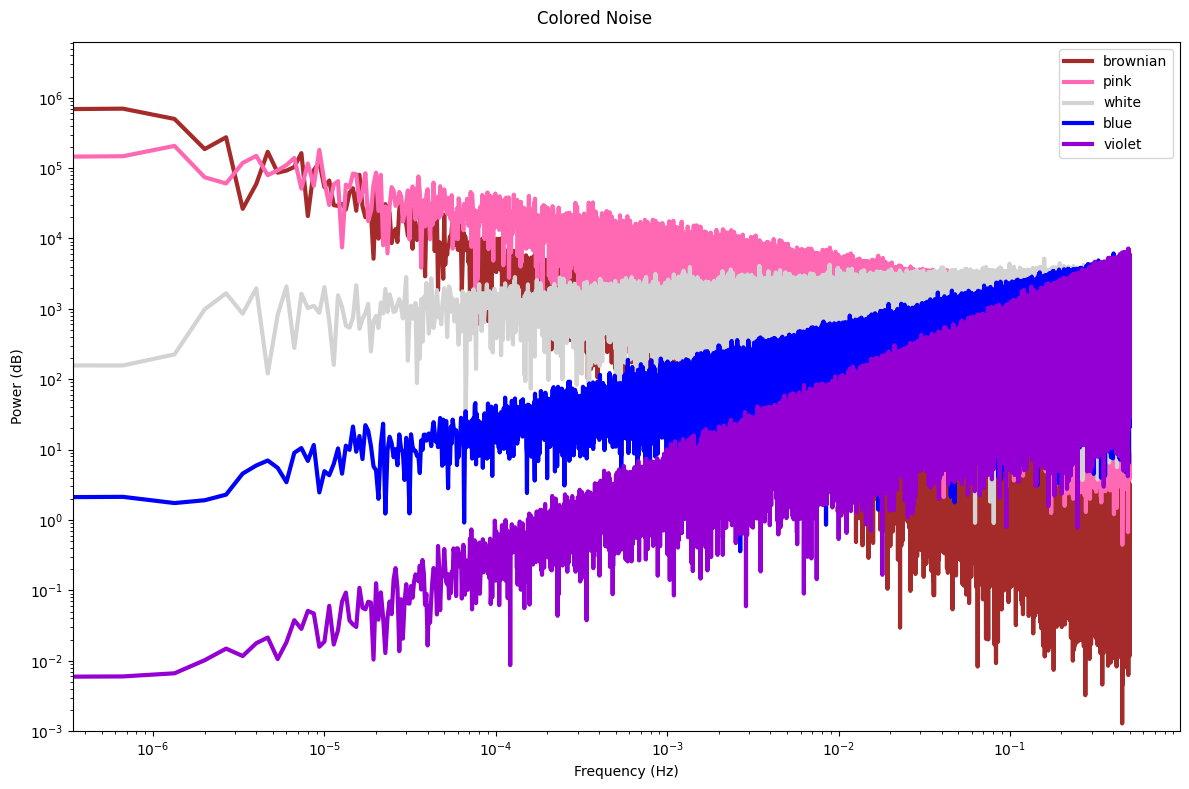

In [10]:
# plt.style.use('dark_background')
plt.figure(figsize=(12, 8), tight_layout=True)
for G, c in zip(
        [brownian_noise, pink_noise, white_noise, blue_noise, violet_noise], 
        ['brown', 'hotpink', 'lightgray', 'blue', 'darkviolet']):
    plot_spectrum(G(30*50000)).set(color=c, linewidth=3)
plt.legend(['brownian', 'pink', 'white', 'blue', 'violet'])
plt.suptitle("Colored Noise")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.ylim([1e-3, None])

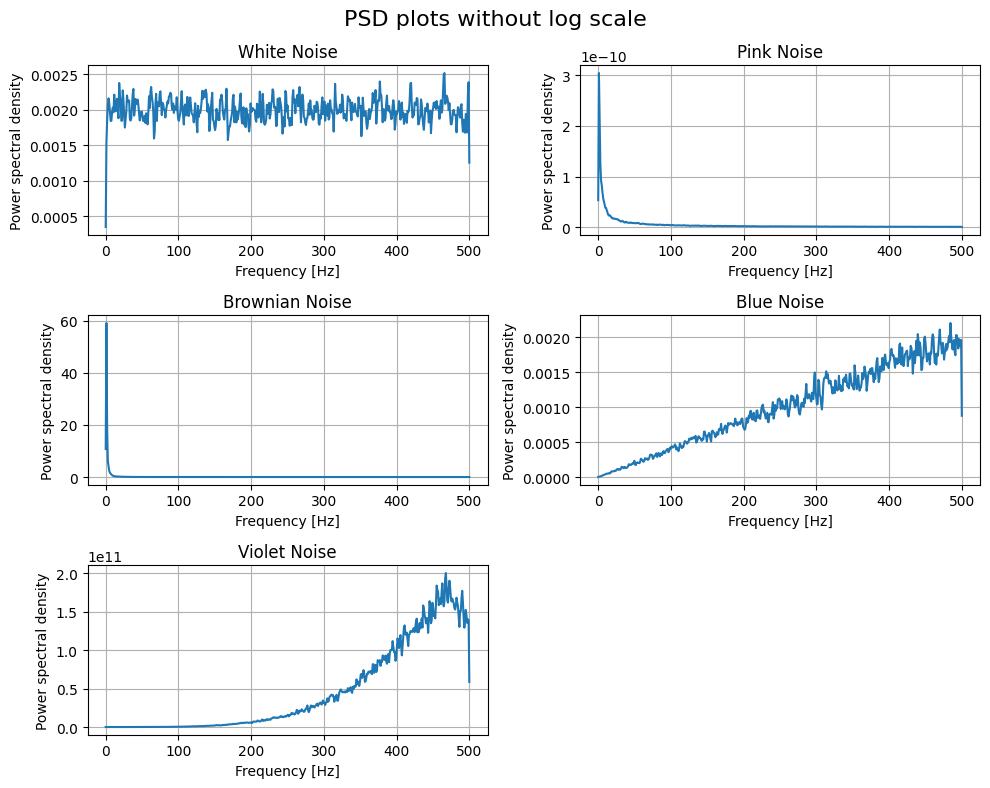

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Function to generate white noise
def white_noise(size):
    return np.random.normal(0, 1, size)

# Function to generate pink noise (1/f)
def pink_noise(size):
    uneven = size % 2
    X = np.random.randn(size//2+1+uneven) + 1j * np.random.randn(size//2+1+uneven)
    S = np.sqrt(np.arange(len(X)) + 1.) # Power-law for pink noise
    y = (np.fft.irfft(X/S)).real
    if uneven:
        y = y[:-1]
    return y

# Function to generate Brownian noise (1/f^2)
def brownian_noise(size):
    return np.cumsum(np.random.randn(size))

# Function to generate blue noise (f)
def blue_noise(size):
    uneven = size % 2
    X = np.random.randn(size//2+1+uneven) + 1j * np.random.randn(size//2+1+uneven)
    S = np.sqrt(np.arange(len(X)))  # Power-law for blue noise
    y = (np.fft.irfft(X*S)).real
    if uneven:
        y = y[:-1]
    return y

# Function to generate violet noise (f^2)
def violet_noise(size):
    uneven = size % 2
    X = np.random.randn(size//2+1+uneven) + 1j * np.random.randn(size//2+1+uneven)
    S = np.arange(len(X)) ** 2  # Power-law for violet noise
    y = (np.fft.irfft(X*S)).real
    if uneven:
        y = y[:-1]
    return y

# Plot PSD using Welch's method
def plot_psd(noise_data, title, fs=1.0):
    f, Pxx = signal.welch(noise_data, fs=fs, nperseg=1024)
    plt.plot(f, Pxx)
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power spectral density')
    plt.grid(True)

# Generate and plot noises
size = 100000  # Number of samples
fs = 1000  # Sampling frequency

noises = {
    'White Noise': white_noise(size),
    'Pink Noise': pink_noise(size),
    'Brownian Noise': brownian_noise(size),
    'Blue Noise': blue_noise(size),
    'Violet Noise': violet_noise(size)
}

plt.figure(figsize=(10, 8))

for i, (name, noise) in enumerate(noises.items(), 1):
    plt.subplot(3, 2, i)
    plot_psd(noise, name, fs)

plt.suptitle("PSD plots without log scale", fontsize=16)
plt.tight_layout()
plt.show()


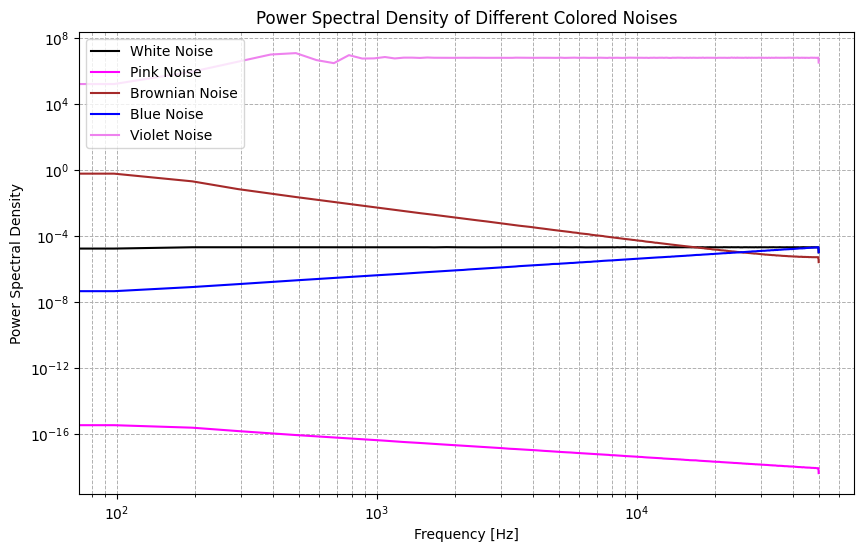

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Function to generate white noise
def white_noise(size):
    return np.random.normal(0, 1, size)

# Function to generate pink noise (1/f)
def pink_noise(size):
    uneven = size % 2
    X = np.random.randn(size//2+1+uneven) + 1j * np.random.randn(size//2+1+uneven)
    S = np.sqrt(np.arange(len(X)) + 1.) # Power-law for pink noise
    y = (np.fft.irfft(X/S)).real
    if uneven:
        y = y[:-1]
    return y

# Function to generate Brownian noise (1/f^2)
def brownian_noise(size):
    return np.cumsum(np.random.randn(size))

# Function to generate blue noise (f)
def blue_noise(size):
    uneven = size % 2
    X = np.random.randn(size//2+1+uneven) + 1j * np.random.randn(size//2+1+uneven)
    S = np.sqrt(np.arange(len(X)))  # Power-law for blue noise
    y = (np.fft.irfft(X*S)).real
    if uneven:
        y = y[:-1]
    return y

# Function to generate violet noise (f^2)
def violet_noise(size):
    uneven = size % 2
    X = np.random.randn(size//2+1+uneven) + 1j * np.random.randn(size//2+1+uneven)
    S = np.arange(len(X)) ** 2  # Power-law for violet noise
    y = (np.fft.irfft(X*S)).real
    if uneven:
        y = y[:-1]
    return y

# Plot PSD using Welch's method
def plot_psd(noise_data, label, color, fs=1.0):
    f, Pxx = signal.welch(noise_data, fs=fs, nperseg=1024)
    plt.loglog(f, Pxx, label=label, color=color)

# Generate noises
size = 10000000  # Number of samples
fs = 100000  # Sampling frequency

noises = {
    'White Noise': (white_noise(size), 'black'),
    'Pink Noise': (pink_noise(size), 'magenta'),
    'Brownian Noise': (brownian_noise(size), 'brown'),
    'Blue Noise': (blue_noise(size), 'blue'),
    'Violet Noise': (violet_noise(size), 'violet')
}

plt.figure(figsize=(10, 6))

# Plot all noises on one plot
for name, (noise, color) in noises.items():
    plot_psd(noise, name, color, fs)

# Customize plot
plt.title('Power Spectral Density of Different Colored Noises')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()


In [23]:
{'a': 2,'b': 4}['a']

2

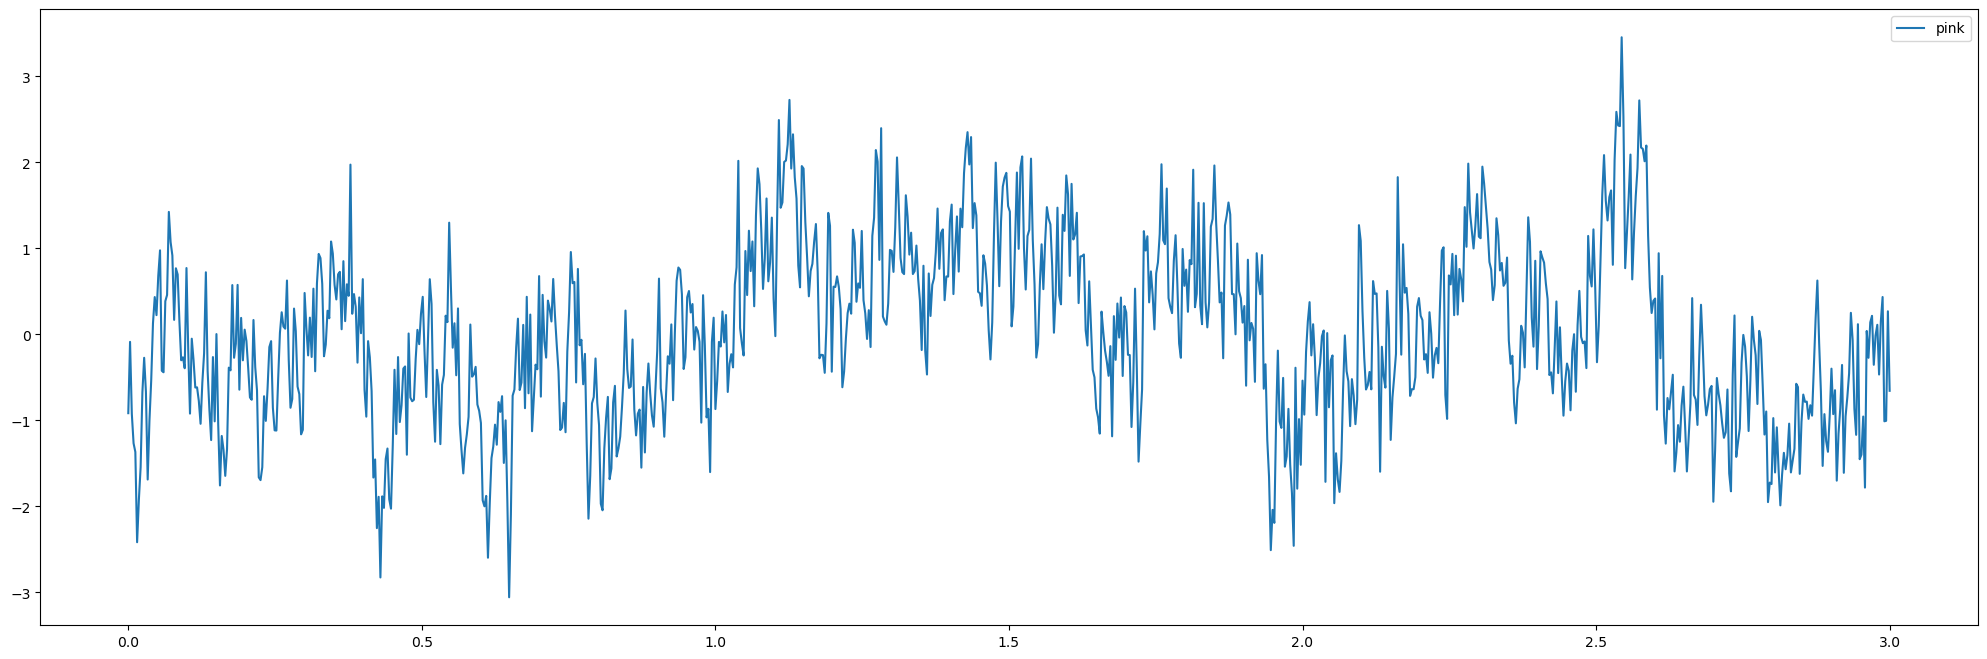

In [22]:
white_noise_signal = white_noise(1000)
brownian_noise_signal = brownian_noise(1000)
pink_noise_signal = pink_noise(1000)
plt.figure(figsize=(25,8))
# plt.plot(np.linspace(0,3,1000), white_noise_signal, label='white')
# plt.plot(np.linspace(0,3,1000), brownian_noise_signal, label='brown')
# plt.plot(np.linspace(0,3,1000), pink_noise_signal, label='pink')
plt.legend()
plt.show()